### Thinking1
什么是反向传播中的链式法则

答：反向传播中的链式法则指在将误差反向传播时，第n层的误差等于第n层到第n+1层的权重矩阵的转置乘以第n+1层的误差，得到误差后利用误差可以计算损失函数关于对应权重的梯度，用以更新对应权重。

### Thinking2
请列举几种常见的激活函数，激活函数有什么作用

答：常见的激活函数有sigmoid，relu，tanh，leaky relu，maxout，softmax。由于激活函数的特点是非线性，而大多数的数据分布都是非线性的，所以使用激活函数可以强化网络的学习能力。而如果不使用激活函数，神经网络将仍然是一个线性模型。

### Thinking3
利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？

答：可能遇到的问题有：  
（1）梯度消失或梯度爆炸：梯度消失可以更换激活函数，梯度爆炸则可以对输出进行最大值约束；  
（2）正则化过度，导致模型欠拟合：可以减小正则化项，或在模型训练初期不采用正则化项；  
（3）学习率过大或过小：除了使用优化器外，还可以在模型趋于收敛时适当调节学习率，以寻找更好的最优点；  
（4）batch size太大，导致训练缓慢：可以适当减小batch size，但如果选取过小的值可能会导致难以收敛。

### Action1
使用Pytorch编写神经网络，完成boston房价预测问题
1）数据加载：from sklearn.datasets import load_boston
2）网络结构：
l1 = Linear(X, W1, b1)
s1 = Relu(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)
隐藏层维度为10

In [10]:
from sklearn.datasets import load_boston

# 载入数据
data = load_boston()
X = data['data']
y = data['target']
y = y.reshape(-1,1) # 让y变成只有一列，行数不知道多少

# 数据探索
print(X.shape)
print(y[:5])

(506, 13)
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [11]:
# 数据规范化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# 将数据放入torch
import torch
X = torch.from_numpy(X).type(torch.FloatTensor) # 对应于numpy中的.astype()
y = torch.from_numpy(y).type(torch.FloatTensor)
y[:5]

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000]])

In [12]:
# 切分数据集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [19]:
# 构造网络，输入层维度13，隐藏层维度10，输出层维度1
from torch import nn
model = nn.Sequential(nn.Linear(13,10),
                     nn.ReLU(),
                     nn.Linear(10,1))

# 选择优化器Adam和损失函数MSE
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam的learning rate常用0.01和0.001

# 进行训练
epochs = 300
loss_list = []
for i in range(epochs):
    # 前向传播
    y_pred = model(train_X)
    # 计算loss
    loss = Loss(train_y, y_pred)
    loss_list.append(loss.item())
    # 梯度清零（pytorch特有）
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 权重更新
    optimizer.step()
    
# 测试
output = model(test_X)
pred = output.detach().numpy()
pred[:5]

array([[17.975628],
       [28.258583],
       [28.686777],
       [21.547297],
       [19.91484 ]], dtype=float32)

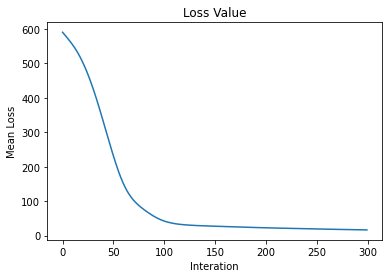

In [23]:
# 进行可视化
import matplotlib.pyplot as plt
import numpy as np
# 查看loss的变化情况
plt.plot(np.arange(epochs),np.array(loss_list))
plt.title('Loss Value')
plt.xlabel('Interation')
plt.ylabel('Mean Loss')
plt.show()

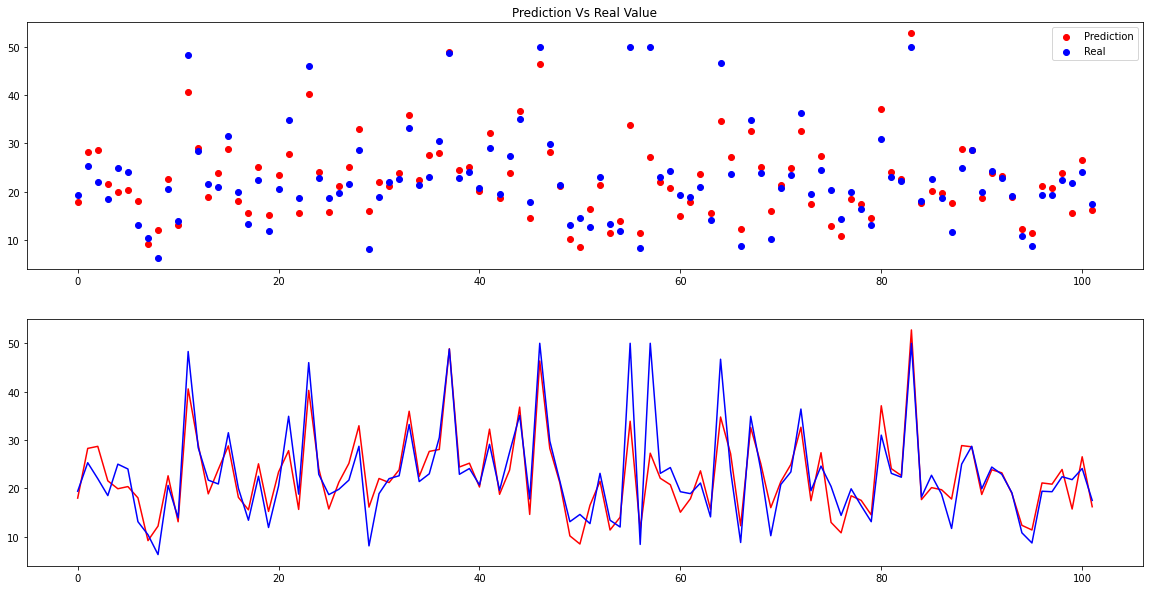

In [54]:
# 比对预测值与实际值
x = np.arange(test_X.shape[0])
y_1 = np.array(pred)
y_2 = test_y
# 散点图
fig = plt.figure(figsize=(20,10))
scatters = plt.subplot(211)
s_1 = plt.scatter(x, y_1, c='red')
s_2 = plt.scatter(x, y_2, c='blue')
plt.legend([s_1,s_2],['Prediction','Real'])
plt.title('Prediction Vs Real Value')
# 折线图
lines = plt.subplot(212)
l_1 = plt.plot(x, y_1, c='red')
l_2 = plt.plot(x, y_2, c='blue')
plt.show()